In [1]:
#（Colab 通常已內建這些套件，此段主要確保環境乾淨）
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 圖片輸出資料夾
FIG_DIR = "/content/figures"
os.makedirs(FIG_DIR, exist_ok=True)

# Matplotlib 基本樣式
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (6, 4)

In [2]:
# 會跳出上傳視窗，請選擇本機的 hw01-dat.txt
uploaded = files.upload()

# 取得實際檔名（通常就是 'hw01-dat.txt'）
data_filename = next(iter(uploaded.keys()))
print("已上傳檔案：", data_filename)

Saving hw01-dat.txt to hw01-dat.txt
已上傳檔案： hw01-dat.txt


In [3]:
# 檔案為三欄數值，以空白/Tab 分隔：t, x, y
df = pd.read_csv(
    data_filename,
    delim_whitespace=True,  # 空白或 Tab 皆可
    header=None,
    names=["t", "x", "y"]
)

# 基本檢查
display(df.head())
print("資料筆數 =", len(df))
assert set(df.columns) == {"t", "x", "y"}, "欄位應為 t, x, y"

# （可選）檢查是否有缺漏值
na_counts = df.isna().sum()
print("缺漏值統計：")
print(na_counts)

/tmp/ipython-input-3333812911.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


,t,x,y
0,0.00,0.3681,-0.9298
1,0.01,0.4016,-1.9292
2,0.02,0.8808,-2.8070
3,0.03,-0.1075,-2.6543
4,0.04,-0.1262,-3.6542


資料筆數 = 1024
缺漏值統計：
t    0
x    0
y    0
dtype: int64


已輸出： /content/figures/plot_xt_yt.png


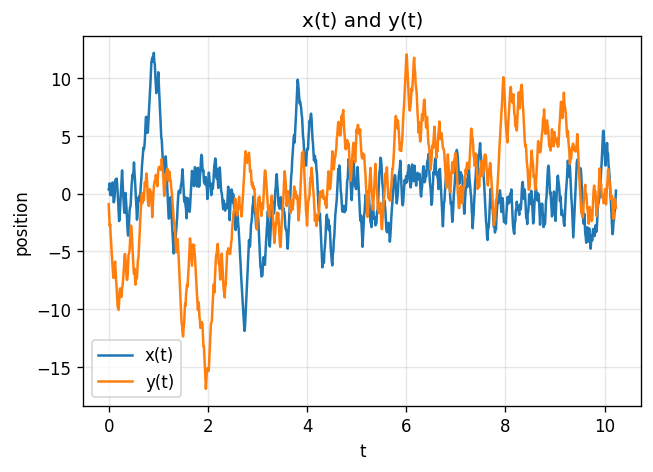

In [4]:
fig1 = plt.figure()
plt.plot(df["t"], df["x"], label="x(t)")
plt.plot(df["t"], df["y"], label="y(t)")
plt.xlabel("t")
plt.ylabel("position")
plt.title("x(t) and y(t)")
plt.legend()
plt.grid(True, alpha=0.3)

# 存檔（放進報告用）
out1 = os.path.join(FIG_DIR, "plot_xt_yt.png")
plt.savefig(out1, bbox_inches="tight")
print("已輸出：", out1)
plt.show()

已輸出： /content/figures/plot_xy.png


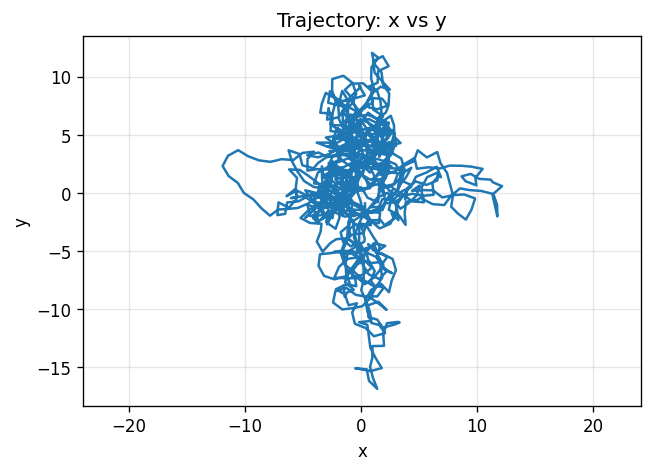

In [5]:
fig2 = plt.figure()
plt.plot(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory: x vs y")
plt.axis("equal")      # 等比例座標，避免形變
plt.grid(True, alpha=0.3)

out2 = os.path.join(FIG_DIR, "plot_xy.png")
plt.savefig(out2, bbox_inches="tight")
print("已輸出：", out2)
plt.show()